## Importação das Bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

## Leitura dos Dados e Divisão

In [5]:
dataset = pd.read_csv('bank-full.csv', delimiter=';')
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
dataset.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15]].values 
y = dataset.iloc[:, -1].values 

In [9]:
np.unique(y, return_counts=True)

(array(['no', 'yes'], dtype=object), array([39922,  5289], dtype=int64))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y) # Stratify garante a divisão correta para dados desbalanceados

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,35,management,single,tertiary,no,1350,yes,no,1,330,1,failure
1,59,admin.,married,secondary,no,145,yes,no,2,287,13,success
2,53,management,married,tertiary,no,1786,yes,no,2,-1,0,unknown
3,37,management,married,tertiary,no,1170,no,yes,3,-1,0,unknown
4,46,entrepreneur,married,primary,no,829,no,yes,7,-1,0,unknown


## Transformação dos Dados

In [13]:
lb = LabelEncoder()
for col in [4, 6, 7]:
    X_train[:, col] = lb.fit_transform(X_train[:, col])
    X_test[:, col] = lb.transform(X_test[:, col])

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [14]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 11])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [15]:
pd.DataFrame(X_train).nunique()

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23      77
24       2
25    6585
26       2
27       2
28      45
29     525
30      40
dtype: int64

In [16]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35,0,1350,1,0,1,330,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,59,0,145,1,0,2,287,13
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,53,0,1786,1,0,2,-1,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,37,0,1170,0,1,3,-1,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,46,0,829,0,1,7,-1,0


In [17]:
sc = StandardScaler()
X_train[:, [23, 25, 28, 29, 30]] = sc.fit_transform(X_train[:, [23, 25, 28, 29, 30]])
X_test[:, [23, 25, 28, 29, 30]] = sc.transform(X_test[:, [23, 25, 28, 29, 30]])

In [18]:
st = SMOTE(sampling_strategy='minority')
X_train, y_train = st.fit_resample(X_train, y_train)

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([31937, 31937], dtype=int64))

In [20]:
X_test = np.array(X_test, dtype=float)
X_train = np.array(X_train, dtype=float)

In [21]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.57122604,
         2.89410015,  0.17460823],
       [ 1.        ,  0.        ,  0.        , ..., -0.24627435,
         2.46464843,  5.19832478],
       [ 0.        ,  0.        ,  0.        , ..., -0.24627435,
        -0.4116794 , -0.24403482],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.57122604,
        -0.4116794 , -0.24403482],
       [ 0.        ,  0.        ,  0.        , ..., -0.24627435,
        -0.4116794 , -0.24403482],
       [ 0.        ,  0.        ,  0.        , ..., -0.24788511,
        -0.4116794 , -0.24403482]])

In [22]:
X_test

array([[ 0.        ,  1.        ,  0.        , ..., -0.24627435,
         2.74429141,  4.36103869],
       [ 0.        ,  1.        ,  0.        , ..., -0.57122604,
        -0.4116794 , -0.24403482],
       [ 0.        ,  0.        ,  1.        , ...,  0.72858072,
        -0.4116794 , -0.24403482],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.07867734,
         4.16248082,  0.17460823],
       [ 0.        ,  1.        ,  0.        , ..., -0.24627435,
        -0.4116794 , -0.24403482],
       [ 0.        ,  0.        ,  0.        , ...,  0.72858072,
        -0.4116794 , -0.24403482]])

## Redes Neurais

In [24]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'), # se x > 0 retorna x se não retorna 0
    tf.keras.layers.Dense(units=6, activation='relu'), 
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Faz cálculo tras valores entre 0 a 1 
])

In [25]:
ann.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
ann.fit( X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7058 - loss: 0.5609
Epoch 2/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.7021 - loss: 0.5661
Epoch 3/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.7034 - loss: 0.5646
Epoch 4/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.6998 - loss: 0.5666
Epoch 5/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.7037 - loss: 0.5634
Epoch 6/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.7046 - loss: 0.5637
Epoch 7/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.7045 - loss: 0.5643
Epoch 8/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.7009 - loss: 0.5660
Epoch 9/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.7022 - loss: 0.5641
Epoch 10/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.7019 - loss: 0.5638
Epoch 11/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.7038 - loss: 0.5639
Epoch 12

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


## Resultados

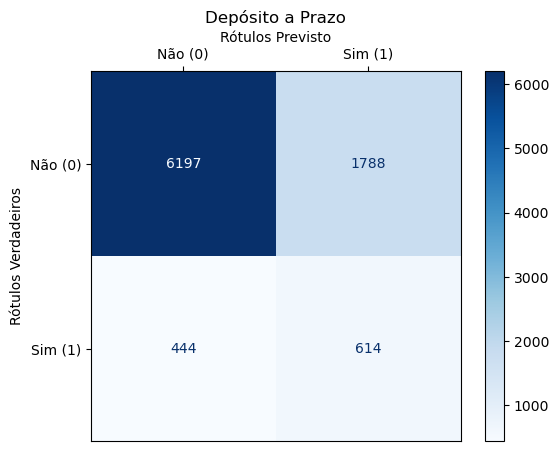

Acurácia: 75.32%


In [29]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Não (0)', 'Sim (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Depósito a Prazo")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")

In [30]:
print(classification_report(y_test, y_pred)) # Verificação Final

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      7985
           1       0.26      0.58      0.35      1058

    accuracy                           0.75      9043
   macro avg       0.59      0.68      0.60      9043
weighted avg       0.85      0.75      0.79      9043

